<a href="https://colab.research.google.com/github/swilsonmfc/timeseries/blob/master/TBATS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TBATS

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSnf6NebPJdBgQIHRq4qP_PCv3_1beu75JF8Q&usqp=CAU)

# Install

In [1]:
!pip install tbats
!pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 1.4 MB 13.7 MB/s 
     |████████████████████████████████| 9.8 MB 37.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 7.2 MB/s 
     |████████████████████████████████| 3.3 MB 50.4 MB/s 
     |████████████████████████████████| 34.5 MB 15 kB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Success

# Setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sktime.datasets import load_airline
from sktime.datasets import load_shampoo_sales

from tbats import TBATS, BATS

from scipy.stats import boxcox

# Data

## Airline

In [4]:
airline_df = load_airline()
airline_df

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

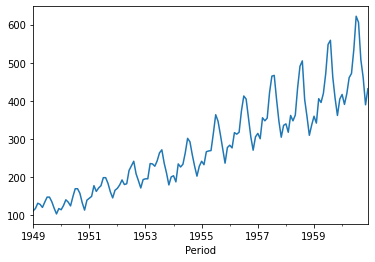

In [5]:
airline_df.plot()

## Shampoo

In [6]:
shampoo_df = load_shampoo_sales()
shampoo_df

Period
1991-01    266.0
1991-02    145.9
1991-03    183.1
1991-04    119.3
1991-05    180.3
1991-06    168.5
1991-07    231.8
1991-08    224.5
1991-09    192.8
1991-10    122.9
1991-11    336.5
1991-12    185.9
1992-01    194.3
1992-02    149.5
1992-03    210.1
1992-04    273.3
1992-05    191.4
1992-06    287.0
1992-07    226.0
1992-08    303.6
1992-09    289.9
1992-10    421.6
1992-11    264.5
1992-12    342.3
1993-01    339.7
1993-02    440.4
1993-03    315.9
1993-04    439.3
1993-05    401.3
1993-06    437.4
1993-07    575.5
1993-08    407.6
1993-09    682.0
1993-10    475.3
1993-11    581.3
1993-12    646.9
Freq: M, Name: Number of shampoo sales, dtype: float64

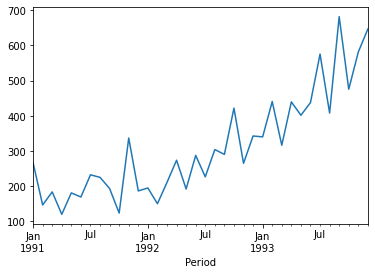

In [7]:
shampoo_df.plot()

# BATS
* Box-Cox Transformations
* AR - MA
* Trend Components
* Seasonal Components

## Box Cox
* Transformation
  * Used on features to make data appear normal
  * Used in time series to help make data stationary (constant variance)
* Finding Lambda
  * What value provides the best normal distribution?
* Alpha
  * Compute a confidence interval for the lambda value

![](https://miro.medium.com/max/884/1*_nHvGg-OQYtNSSZph-424g.png)

![](https://sixsigmastudyguide.com/wp-content/uploads/2019/11/box3.png)

Text(0.5, 1.0, 'Box-Cox Transformed')

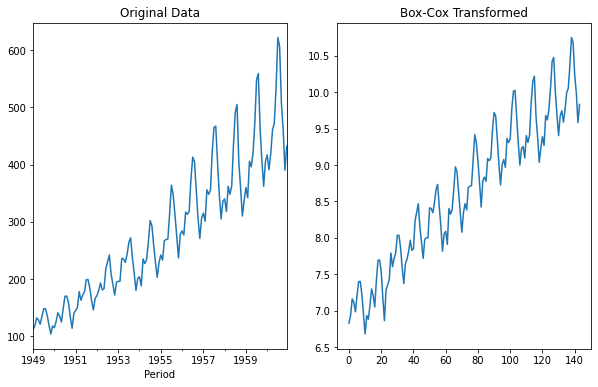

In [16]:
transformed_bc = boxcox(airline_df)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
airline_df.plot(ax=ax1)
ax1.set_title('Original Data')
ax2.plot(transformed_bc[0])
ax2.set_title('Box-Cox Transformed')

## Model

In [23]:
model = BATS()
fitted = model.fit(airline_df)

In [24]:
print(fitted.summary())

Use Box-Cox: True
Use trend: False
Use damped trend: False
Seasonal periods: []
ARMA errors (p, q): (4, 3)
Box-Cox Lambda 0.097153
Smoothing (Alpha): 0.255884
Seasonal Parameters (Gamma): []
AR coefficients [ 0.89740962 -0.07127929 -0.23015174 -0.07084778]
MA coefficients [ 0.00662566 -0.41519767  0.10063882]
Seed vector [6.25955032 0.         0.         0.         0.         0.
 0.         0.        ]

AIC 1665.828681


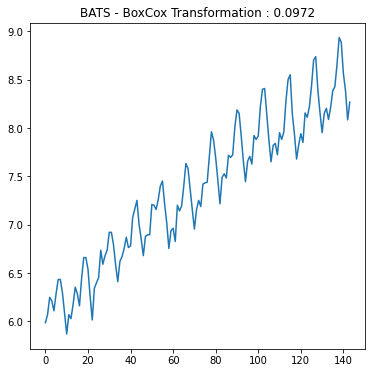

In [29]:
lambda_value = fitted.params.box_cox_lambda
transformed_bc = boxcox(airline_df, lmbda=lambda_value)
plt.figure(figsize=(6,6))
plt.plot(transformed_bc)
plt.title(f'BATS - BoxCox Transformation : {lambda_value:.4f}');

## Forecast

In [92]:
yhat = fitted.forecast(steps=12)
start = airline_df.index.max().to_timestamp()
index = pd.date_range(start, periods=13, closed='right', freq='MS')
forecast_df = pd.DataFrame(index=index, data=yhat, columns=['predicted'])

## Visualize

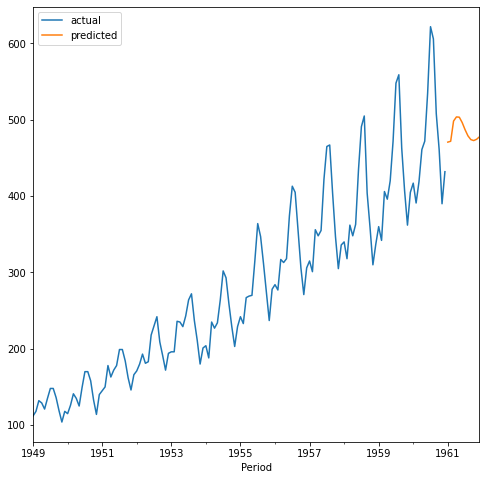

In [93]:
fig = plt.figure(figsize=(8, 8))
ax = airline_df.plot(label='actual')
forecast_df.plot(ax=ax)
plt.legend();

# TBATS
* Features
  * Trigonometric Seasonality (Fourier - Sines and Cosines)
  * Box-Cox Transformations
  * AR - MA
  * Trend Components
  * Seasonal Components
* Outperforms BATS in presence of complex seasonality
* https://robjhyndman.com/papers/ComplexSeasonality.pdf

## Model

In [65]:
model = TBATS()
fitted = model.fit(airline_df)

In [66]:
print(fitted.summary())

Use Box-Cox: True
Use trend: False
Use damped trend: False
Seasonal periods: []
Seasonal harmonics []
ARMA errors (p, q): (4, 3)
Box-Cox Lambda 0.097153
Smoothing (Alpha): 0.255884
Seasonal Parameters (Gamma): []
AR coefficients [ 0.89740962 -0.07127929 -0.23015174 -0.07084778]
MA coefficients [ 0.00662566 -0.41519767  0.10063882]
Seed vector [6.25955032 0.         0.         0.         0.         0.
 0.         0.        ]

AIC 1665.828681


## Forecast

In [67]:
yhat = fitted.forecast(steps=12)
start = airline_df.index.max().to_timestamp()
index = pd.date_range(start, periods=13, closed='right', freq='MS')
forecast_df = pd.DataFrame(index=index, data=yhat, columns=['predicted'])

## Visualize

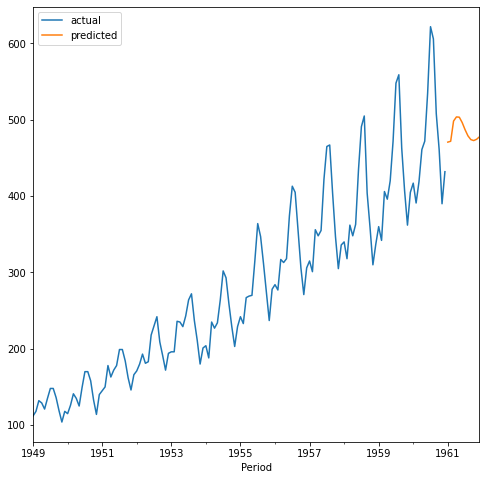

In [68]:
fig = plt.figure(figsize=(8, 8))
ax = airline_df.plot(label='actual')
forecast_df.plot(ax=ax)
plt.legend();

# Trend
* When use_trend is set to default (None)
* It tests with and without trend selecting lowest AIC
* Here we force the trend component

In [94]:
model = TBATS(use_trend=True)
fitted = model.fit(airline_df)
print(fitted.summary())

Use Box-Cox: True
Use trend: True
Use damped trend: True
Seasonal periods: []
Seasonal harmonics []
ARMA errors (p, q): (0, 0)
Box-Cox Lambda 0.000000
Smoothing (Alpha): 1.284945
Trend (Beta): -0.045135
Damping Parameter (Phi): 0.811657
Seasonal Parameters (Gamma): []
AR coefficients []
MA coefficients []
Seed vector [ 4.8375315  -0.01114596]

AIC 1668.687285


In [95]:
yhat = fitted.forecast(steps=12)
start = airline_df.index.max().to_timestamp()
index = pd.date_range(start, periods=13, closed='right', freq='MS')
forecast_df = pd.DataFrame(index=index, data=yhat, columns=['predicted'])

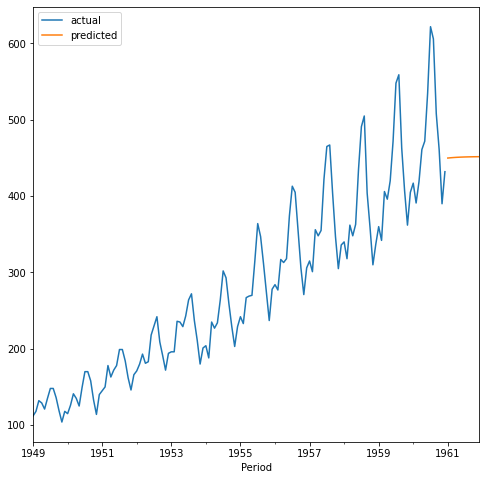

In [96]:
fig = plt.figure(figsize=(8, 8))
ax = airline_df.plot(label='actual')
forecast_df.plot(ax=ax)
plt.legend();

# Seasonality
* This is a seasonal problem, adding it makes a big improvement


In [69]:
model = TBATS(seasonal_periods=(12, ))
fitted = model.fit(airline_df)
print(fitted.summary())

Use Box-Cox: True
Use trend: True
Use damped trend: False
Seasonal periods: [12.]
Seasonal harmonics [5]
ARMA errors (p, q): (0, 0)
Box-Cox Lambda 0.000000
Smoothing (Alpha): 0.762786
Trend (Beta): 0.035132
Damping Parameter (Phi): 1.000000
Seasonal Parameters (Gamma): [-2.67397734e-07  6.91466869e-08]
AR coefficients []
MA coefficients []
Seed vector [ 4.81003417 -0.00858031 -0.14832239  0.05633621 -0.00904648  0.01081748
  0.00562992  0.02727922  0.05868876 -0.02752747 -0.03212159 -0.02132667]

AIC 1399.553947


In [70]:
yhat = fitted.forecast(steps=12)
start = airline_df.index.max().to_timestamp()
index = pd.date_range(start, periods=13, closed='right', freq='MS')
forecast_df = pd.DataFrame(index=index, data=yhat, columns=['predicted'])

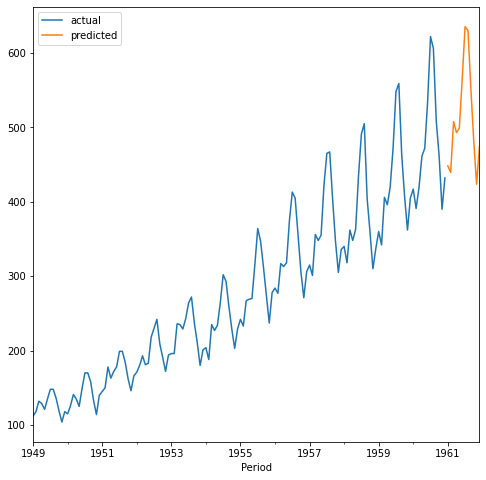

In [71]:
fig = plt.figure(figsize=(8, 8))
ax = airline_df.plot(label='actual')
forecast_df.plot(ax=ax)
plt.legend();

## Determining Seasonality
* What if we have multiple seasonality or have uncertainly (MSTL)
  * Visual inspection / Autocorrelation
  * Statsmodel 0.14 with Python 3.8+ 
  * R forecast package 

# Confidence Intervals

In [72]:
model = TBATS(seasonal_periods=(12, ))
fitted = model.fit(airline_df)
print(fitted.summary())

Use Box-Cox: True
Use trend: True
Use damped trend: False
Seasonal periods: [12.]
Seasonal harmonics [5]
ARMA errors (p, q): (0, 0)
Box-Cox Lambda 0.000000
Smoothing (Alpha): 0.762786
Trend (Beta): 0.035132
Damping Parameter (Phi): 1.000000
Seasonal Parameters (Gamma): [-2.67397734e-07  6.91466869e-08]
AR coefficients []
MA coefficients []
Seed vector [ 4.81003417 -0.00858031 -0.14832239  0.05633621 -0.00904648  0.01081748
  0.00562992  0.02727922  0.05868876 -0.02752747 -0.03212159 -0.02132667]

AIC 1399.553947


In [79]:
yhat, confint = fitted.forecast(steps=12, confidence_level=0.95)
start = airline_df.index.max().to_timestamp()
index = pd.date_range(start, periods=13, closed='right', freq='MS')
forecast_df = pd.DataFrame(index=index, data=confint)

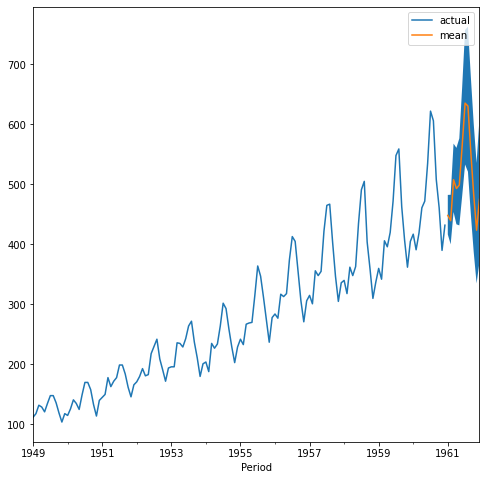

In [83]:
fig = plt.figure(figsize=(8, 8))
ax = airline_df.plot(label='actual')
forecast_df['mean'].plot(ax=ax)
plt.fill_between(forecast_df.index, forecast_df['lower_bound'], forecast_df['upper_bound'])
plt.legend();

# Evolving Model